In [1]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv"
sales_data = pd.read_csv(url)
print(sales_data.head())  # To see the first few rows of the dataset


                         date      sales
0  2022-09-03 17:10:08.079328  55.292157
1  2022-09-04 17:10:08.079328  53.803211
2  2022-09-05 17:10:08.079328  58.141693
3  2022-09-06 17:10:08.079328  64.530899
4  2022-09-07 17:10:08.079328  66.013633


/tmp/ipykernel_556/3056014946.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


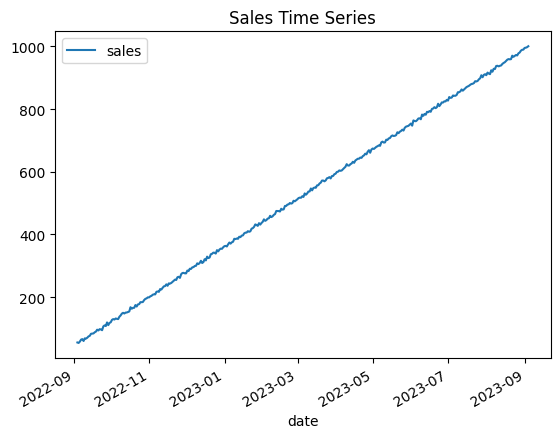

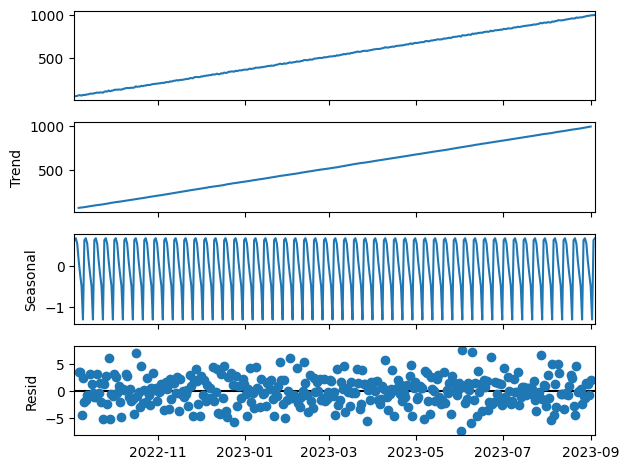

In [2]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure the date column is in datetime format and set it as the index
sales_data['date'] = pd.to_datetime(sales_data['date'])
sales_data.set_index('date', inplace=True)

# Plot the time series
sales_data.plot()
plt.title('Sales Time Series')
plt.show()

# Decompose the time series to analyze trend, seasonality, and residuals
decomposition = seasonal_decompose(sales_data, model='additive')  # or use model='multiplicative' depending on the nature of the series
decomposition.plot()
plt.show()


In [3]:
# Decide the split point
split_point = int(len(sales_data) * 0.8)  # 80% for training, 20% for testing

# Split the data
train_data = sales_data[:split_point]
test_data = sales_data[split_point:]

print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")


Training data shape: (292, 1)
Test data shape: (74, 1)


In [4]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# Finding the best ARIMA model
auto_model = auto_arima(sales_data, d=1, seasonal=False, trace=True)

# Fit the ARIMA model
arima_model = ARIMA(sales_data, order=auto_model.order)
arima_model_fit = arima_model.fit()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1843.274, Time=0.63 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2096.542, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1970.972, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1839.586, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2209.657, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1839.552, Time=0.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1841.532, Time=0.64 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1843.586, Time=0.68 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1839.607, Time=0.20 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1922.648, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.28 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 2.984 seconds


/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


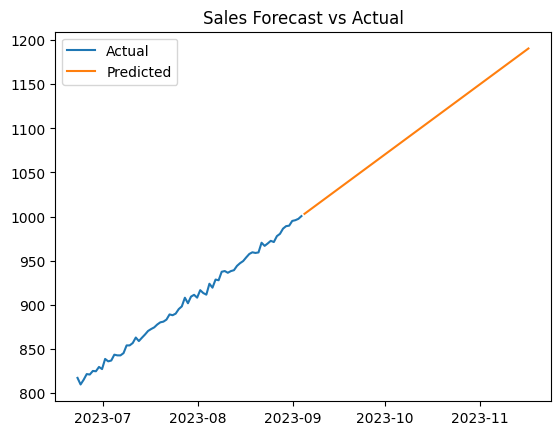

In [5]:
# Assuming you have a 'test_data' set
predictions = arima_model_fit.forecast(len(test_data))
plt.figure()
plt.plot(test_data, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Sales Forecast vs Actual')
plt.legend()
plt.show()


In [6]:
import pickle

# Save the model to a file
with open('arima_model.pkl', 'wb') as model_file:
    pickle.dump(arima_model_fit, model_file)
